<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_26_multiclase/class_26_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Constitución de un detector de virgínica 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler 

from sklearn.svm import LinearSVC 

from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import recall_score

# Configuración de los predictores y las etiquetas para el modelo que quieres

In [3]:
def configurar_datos_para_detectores_con_dos_atributos(s = False, ver = False, vir = True,\
                                                       sepalo = False, petalo = True):
    X, y = load_iris(return_X_y = True)
    if sepalo: 
        X = X[:,(0,1)]
    if petalo:
        X = X[:,(2,3)]
    if s:
        y = (y==0)*1
    if ver:
        y = (y==1)*1 
    if vir:
        y = (y==2)*1    
    return X, y    

In [5]:
X,y = configurar_datos_para_detectores_con_dos_atributos(s = False, ver = False, vir = True,\
                                                       sepalo = False, petalo = True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, \
                                                   stratify = y)

In [7]:
escalador = StandardScaler() 

In [8]:
X_train_escalado = escalador.fit_transform(X_train)
X_test_escalado = escalador.transform(X_test)

# Modelar o crear el modelo clasificador con una máquina de soporte vectorial


In [51]:
svm_clf = LinearSVC(C=1, loss="hinge")

In [52]:
svm_clf.fit(X_train_escalado, y_train)

LinearSVC(C=1, loss='hinge')

# Visualizamos nuestro clasificador en en conjunto de entrenamiento 


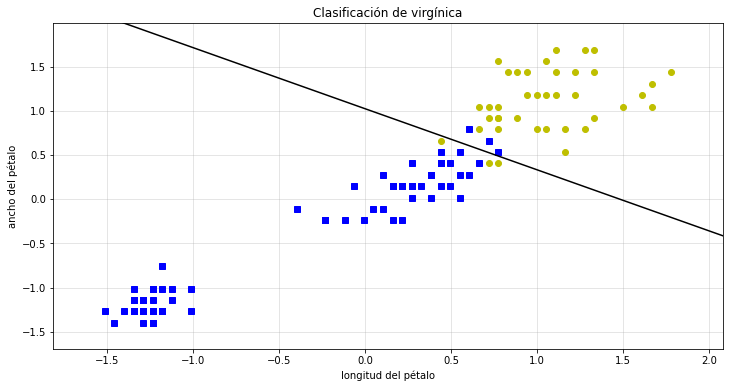

In [53]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.set(xlabel ='longitud del pétalo', ylabel = 'ancho del pétalo' ,\
       title = 'Clasificación de virgínica' )

c,d = X_train_escalado[:,0].min()-0.3, X_train_escalado[:,0].max()+0.3
e,f = X_train_escalado[:,1].min()-0.3, X_train_escalado[:,1].max()+0.3

ax.axis([c,d,e,f])

#grafica de la clase positiva 
ax.plot(X_train_escalado[:,0][y_train == 1], X_train_escalado[:,1][y_train == 1], 'yo')
#grafica para la clase negativa
ax.plot(X_train_escalado[:,0][y_train == 0], X_train_escalado[:,1][y_train == 0], 'bs')

# grafiquemos la frontera de decisión
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
m_ = -w[0]/w[1]
b_ = -b/w[1]

x0 = np.array([c,d])
decision_boundary = m_*x0 + b_ 

ax.plot(x0, decision_boundary, 'k-')
ax.grid(alpha = 0.4)

plt.savefig('detector_virginica.png')

plt.show() 



In [54]:
svm_clf.coef_[0], svm_clf.intercept_[0]

(array([1.43277536, 2.06539747]), -2.1248792920868436)

In [55]:
-w[0]/w[1], -b/w[1]

(-0.6937044222907661, 1.0287992110317696)

In [56]:
y_train_predicciones = cross_val_predict(svm_clf, X_train_escalado, y_train, cv = 5)

In [57]:
recall_score(y_train, y_train_predicciones) 

0.925

## Verificación en el conjunto de testeo 

In [58]:
y_test_predicciones = svm_clf.predict(X_test_escalado)

In [59]:
recall_score(y_test, y_test_predicciones)

0.9